In [9]:
import pandas as pd
df = pd.read_csv('output.csv')
df.head()

,clave_entidad,MUN,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,...,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,pobreza_pob,ic_sbv_pob
0,-1.0,-1.000000,-0.667379,-0.668466,-0.669906,-0.675851,-0.675117,-0.674121,-0.667382,-0.666393,...,-0.768508,-0.727457,-0.850746,-0.837057,-0.672004,-0.652226,-0.640072,0.659478,-0.670950,-0.153252
1,-1.0,-0.992958,0.270510,0.258545,0.276639,0.467006,0.538028,0.396623,0.263038,0.259967,...,0.441172,-0.127052,0.046532,0.461235,-0.584760,-0.144214,0.035099,-0.598184,-0.191031,-0.708615
2,-1.0,-0.985915,0.436289,0.422225,0.443786,0.461912,0.483568,0.439525,0.438624,0.437378,...,-0.768508,0.067911,-0.850746,-0.837057,-0.511872,-0.466469,0.158342,-0.686720,-0.006673,-0.869669
3,-1.0,-0.978873,-0.582242,-0.584179,-0.582334,-0.523038,-0.494836,-0.550890,-0.584221,-0.583376,...,-0.445630,-0.625815,-0.608428,-0.498029,-0.847598,-0.757270,-0.728000,-0.886493,-0.755253,-0.943324
4,-1.0,-0.971831,-0.667379,-0.668466,-0.669906,-0.675851,-0.675117,-0.674121,-0.667382,-0.666393,...,-0.768508,-0.727457,-0.850746,-0.837057,-0.471010,-0.320475,0.646414,-0.664018,0.397107,-0.761329


In [20]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error


target = "ic_sbv_pob"
features = ["VPH_SINLTC", "VPH_SINTIC", "VPH_AGUAFV", "VPH_PISOTI", "VPH_SNBIEN"]

X = df_imputed[features]
y = df_imputed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler()
}

X_train_scaled = scalers["standard"].fit_transform(X_train)
X_test_scaled = scalers["standard"].transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "AdaBoost": AdaBoostRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, objective="reg:squarederror"),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

results = []

for name, model in models.items():
    if name in ["Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost", "XGBoost"]:
        X_train_final, X_test_final = X_train, X_test
    else:
        X_train_final, X_test_final = X_train_scaled, X_test_scaled

    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({"Model": name, "R²": r2, "MSE": mse})


In [21]:
df_results = pd.DataFrame(results)
df_results

,Model,R²,MSE
0,Linear Regression,0.306512,0.146595
1,Ridge,0.306562,0.146585
2,Bayesian Ridge,0.307364,0.146415
3,Decision Tree,0.435668,0.119293
4,Random Forest,0.434842,0.119468
5,Gradient Boosting,0.459868,0.114178
6,SVR,0.401111,0.126598
7,AdaBoost,0.437120,0.118986
8,XGBoost,0.431573,0.120159
9,Neural Network,0.444393,0.117449


In [3]:
df_results = pd.DataFrame(results)
df_results

,Model,R²,MSE
0,Linear Regression,0.765271,0.004929
1,Ridge,0.765225,0.004929
2,Bayesian Ridge,0.765109,0.004932
3,Decision Tree,0.689837,0.006512
4,Random Forest,0.751920,0.005209
5,Gradient Boosting,0.722718,0.005822
6,SVR,0.590620,0.008596
7,AdaBoost,0.699439,0.006311
8,XGBoost,0.716833,0.005946
9,Neural Network,0.773579,0.004754


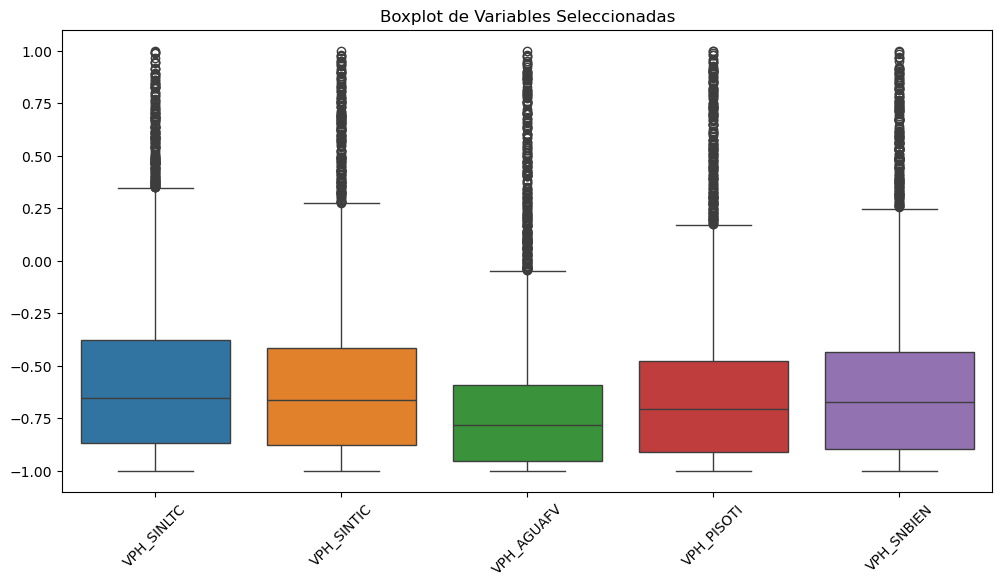

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

sns.boxplot(data=df[features])

# Rotar etiquetas en el eje X para mejor visualización
plt.xticks(rotation=45)

# Título y mostrar gráfico
plt.title("Boxplot de Variables Seleccionadas")
plt.show()

/Users/marielalvarez/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


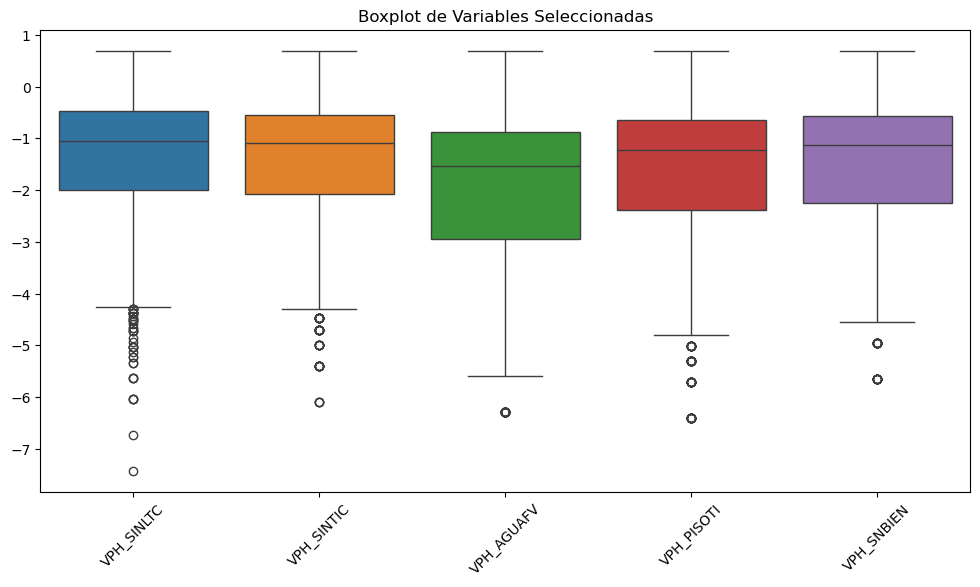

In [23]:
import numpy as np

# Aplicar transformación logarítmica
df_log = df.copy()
for col in columns_to_clean:
    df_log[col] = np.log1p(df_log[col]) 
    
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_log[features])

# Rotar etiquetas en el eje X para mejor visualización
plt.xticks(rotation=45)

# Título y mostrar gráfico
plt.title("Boxplot de Variables Seleccionadas")
plt.show()

In [7]:
df2 = pd.read_csv('df_ic_sbv_pob_limpio.csv')


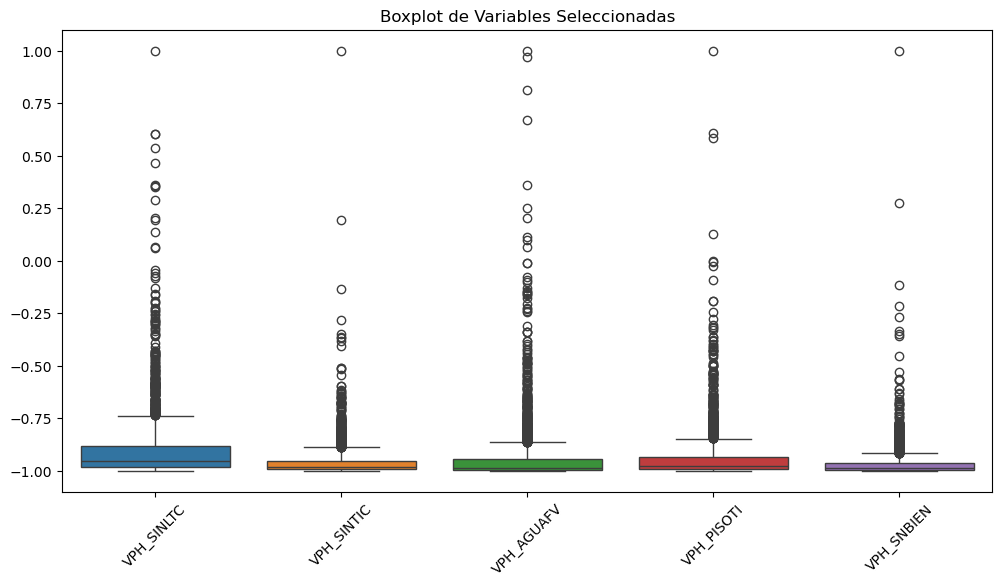

In [8]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df2[features])

# Rotar etiquetas en el eje X para mejor visualización
plt.xticks(rotation=45)

# Título y mostrar gráfico
plt.title("Boxplot de Variables Seleccionadas")
plt.show()